In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [3]:
# stress 파일 불러오기
stress = pd.read_csv('../hyunhee/learning/machinelearning/project_team/stress/train.csv')
test = pd.read_csv('../hyunhee/learning/machinelearning/project_team/stress/test.csv')

In [4]:
stress

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,3,30,0,6,1,2,4,1,1,4,...,4,4,2,5,1,3,2,2,1,0
1,10,18,1,9,3,1,2,4,3,3,...,3,2,2,2,3,3,2,3,3,1
2,1,29,0,7,1,2,5,1,1,4,...,5,5,1,4,1,3,2,1,1,0
3,11,15,1,9,2,1,2,4,3,3,...,2,3,3,3,2,3,3,2,2,1
4,15,14,1,19,3,3,1,3,3,1,...,2,1,4,1,5,1,4,4,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,10,17,0,13,3,1,2,4,2,2,...,3,2,3,3,2,3,2,2,3,1
876,9,17,0,13,2,1,2,4,3,3,...,2,2,3,3,3,3,3,3,3,1
877,16,9,1,27,5,3,1,5,4,1,...,2,1,4,2,5,1,4,4,5,2
878,18,6,1,23,5,3,1,5,4,2,...,1,1,3,2,4,1,5,4,5,2


#### 상관 관계 확인

In [5]:
# stress 칼럼 확인
stress.columns

Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')

In [6]:
data = stress[['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level']]

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
correlation_matrix = data.corr()

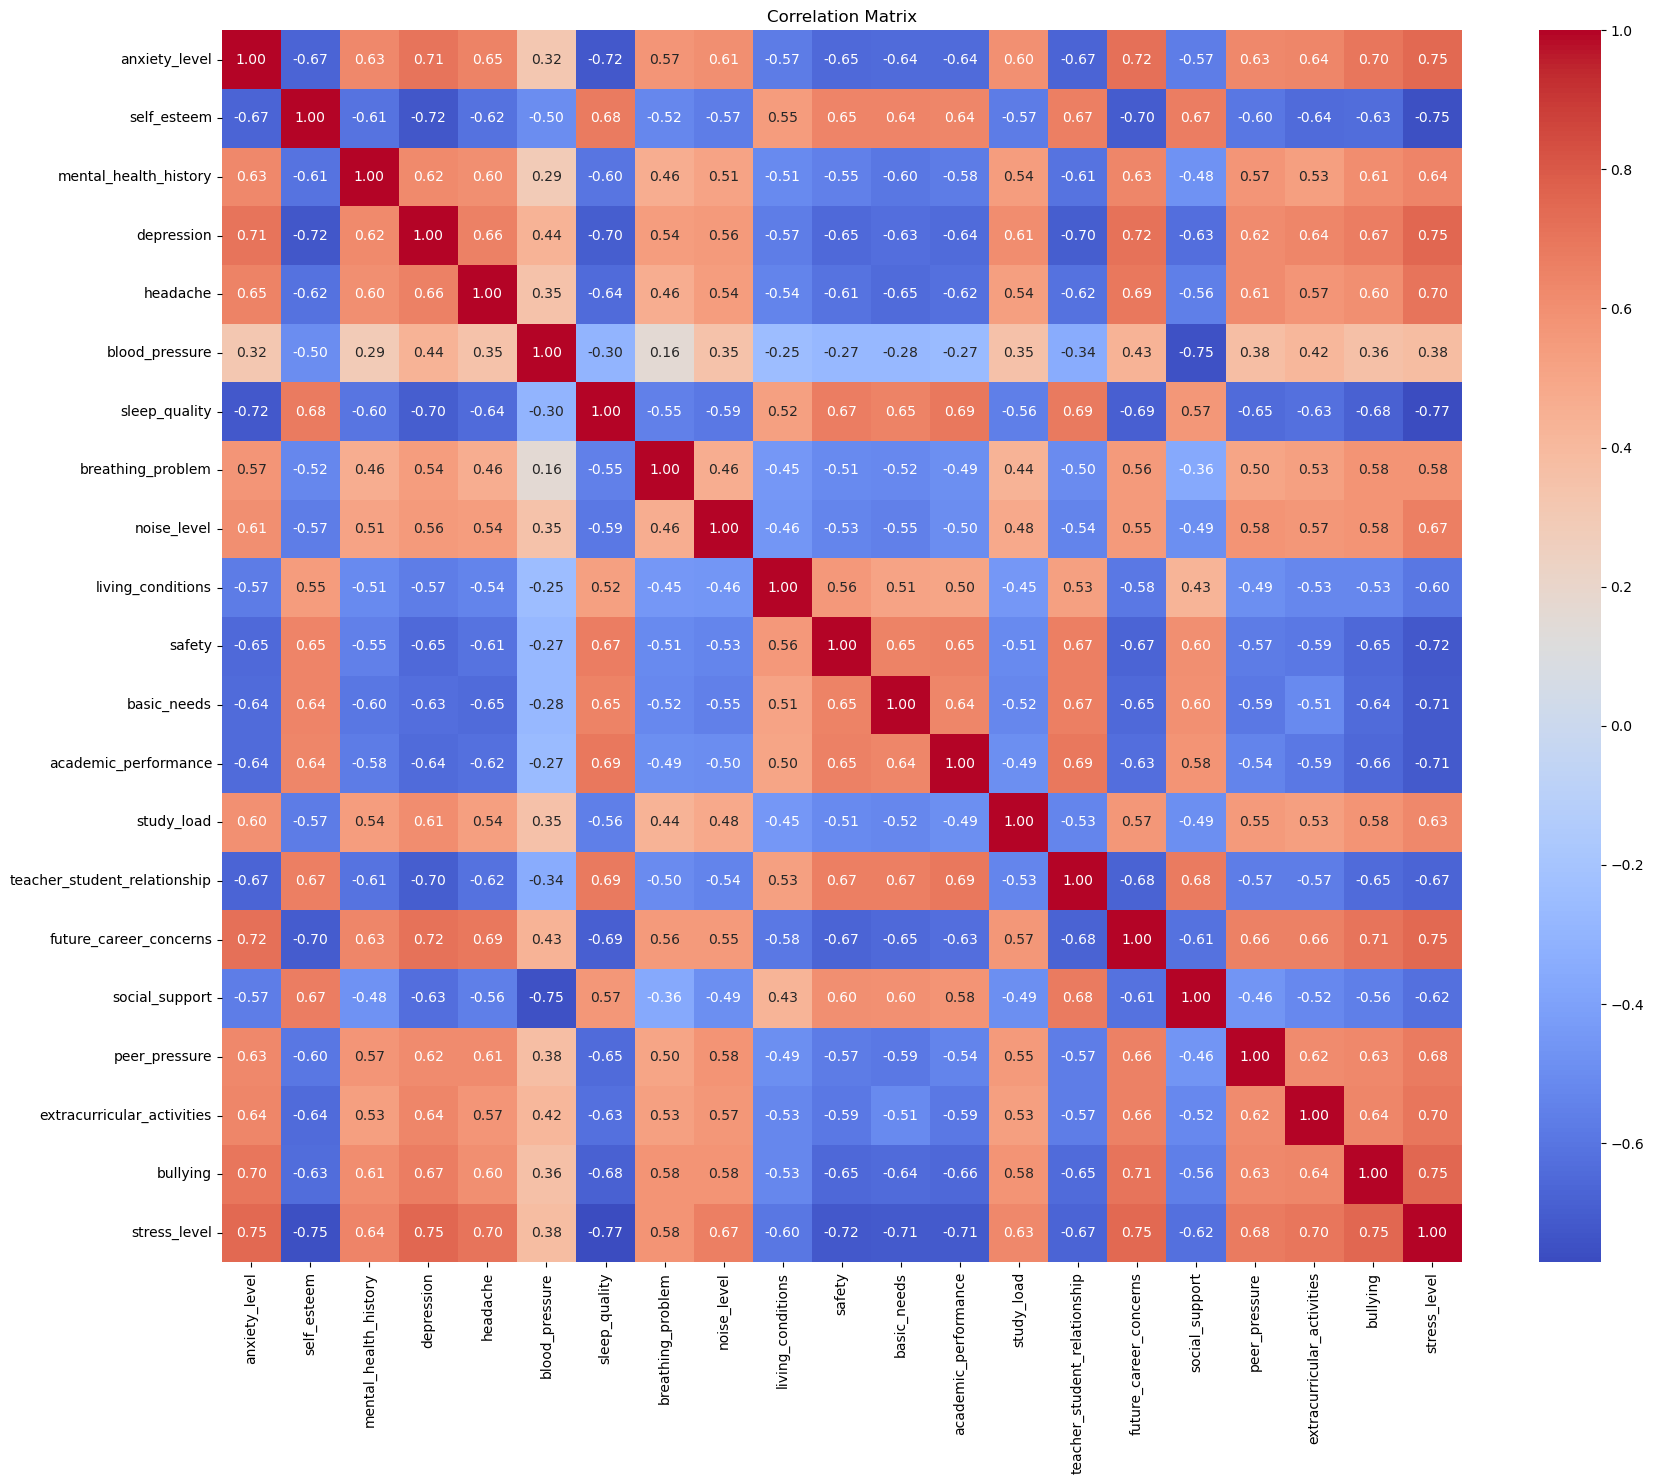

In [9]:
# 상관관계 시각화
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [43]:
print(correlation_matrix['stress_level'])

anxiety_level                   0.745550
self_esteem                    -0.752209
mental_health_history           0.642696
depression                      0.751984
headache                        0.703555
blood_pressure                  0.380205
sleep_quality                  -0.771409
breathing_problem               0.578093
noise_level                     0.665562
living_conditions              -0.596224
safety                         -0.719920
basic_needs                    -0.709662
academic_performance           -0.714987
study_load                      0.628236
teacher_student_relationship   -0.670359
future_career_concerns          0.749235
social_support                 -0.622238
peer_pressure                   0.677305
extracurricular_activities      0.699150
bullying                        0.751887
stress_level                    1.000000
Name: stress_level, dtype: float64


In [44]:
# 원본 데이터의 상관관계 - 범주형 데이터이기 때문에 cramer_v를 사용
# 연속형 변수인 'anxiety_level', 'self_esteem','depression'를 제외함.

original = pd.read_csv('../hyunhee/learning/machinelearning/project_team/stress/StressLevelDataset.csv')
original = original.drop(columns=['anxiety_level', 'self_esteem','depression'])

In [45]:
from scipy.stats import chi2_contingency
def cramers_v(confusion_matrix):
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k-1, r-1))))
def cramers_v_matrix(df):
    columns = df.columns
    n = len(columns)
    cramers_v_matrix = pd.DataFrame(np.zeros((n, n)), index=columns, columns=columns)
    for i in range(n):
        for j in range(i, n):
            if i == j:
                cramers_v_matrix.iloc[i, j] = 1.0
            else:
                confusion_matrix = pd.crosstab(df.iloc[:, i], df.iloc[:, j])
                cramers_v_matrix.iloc[i, j] = cramers_v(confusion_matrix)
                cramers_v_matrix.iloc[j, i] = cramers_v_matrix.iloc[i, j]
    return cramers_v_matrix

In [46]:
v_matrix = cramers_v_matrix(original)

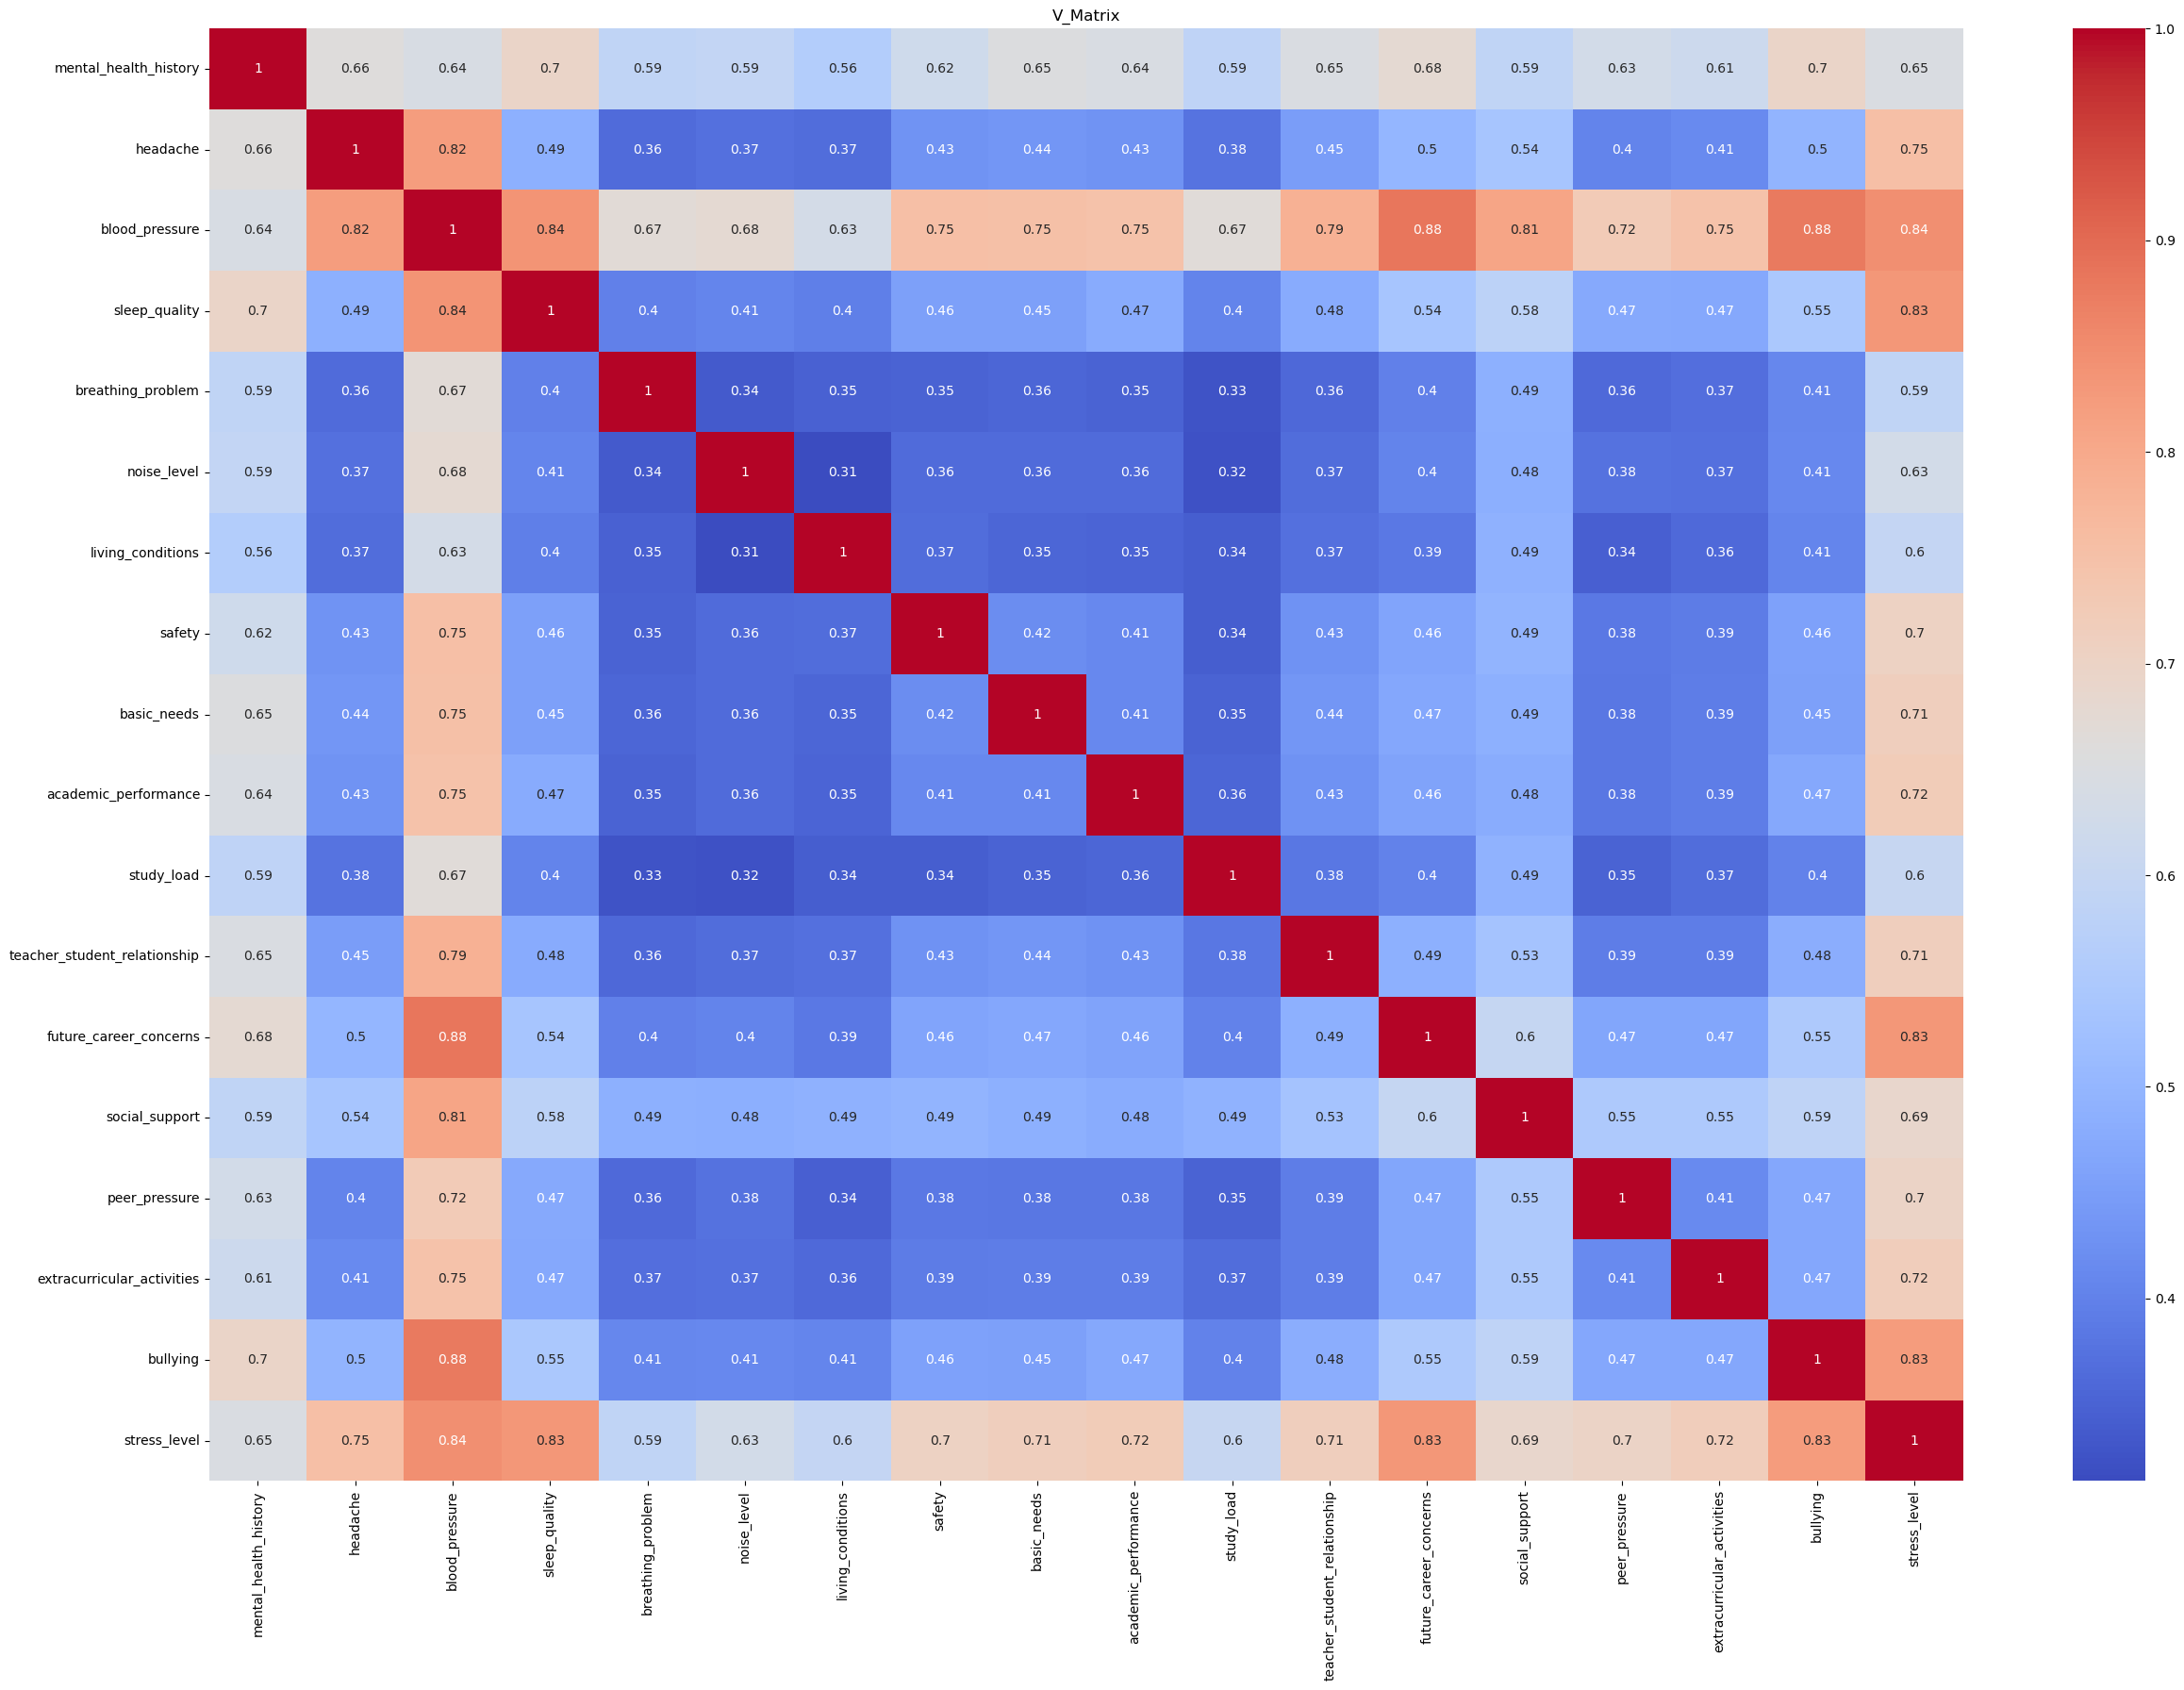

In [47]:
plt.figure(figsize=(30, 20))
sns.heatmap(v_matrix, annot=True, cmap='coolwarm')
plt.title('V_Matrix')
plt.show()

#### 모든 특성을 포함하여 test, train (sub/val)

In [48]:
input = stress[['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying']]

In [49]:
target = stress['stress_level']

In [50]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(input, target, test_size = 0.2,random_state = 42)

## LOGISTIC REGRESSION

In [51]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(val_input,val_target))

0.9076704545454546
0.9034090909090909


C:\ProgramData\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
lr_train = lr.score(train_input, train_target)
lr_val = lr.score(val_input,val_target)

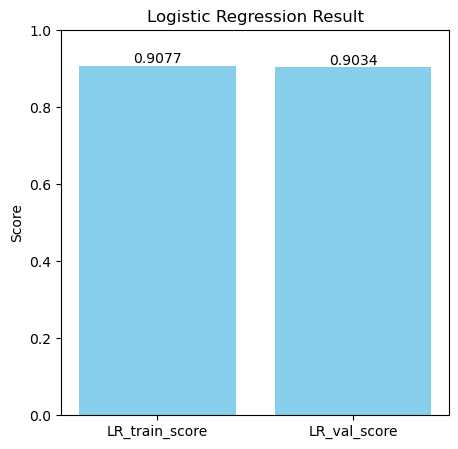

In [53]:
# 교차검증 전 후 정확도 비교
labels = ['LR_train_score', 'LR_val_score']
scores = [lr_train, lr_val]

plt.figure(figsize=(5, 5))
plt.bar(labels, scores, color=['skyblue', 'skyblue'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Logistic Regression Result')

for label, score in zip(labels, scores):
    plt.text(label, score, f'{score:.4f}', ha='center', va='bottom')

plt.show()

#### SGDClssifier

In [21]:
# 정규화
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
ss.fit(train_input)

train_input_scaled = ss.transform(train_input)
val_input_scaled = ss.transform(val_input)

In [22]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_input_scaled, train_target)

print(sc.score(train_input_scaled, train_target))
print(sc.score(val_input_scaled, val_target))

0.9019886363636364
0.8920454545454546


C:\ProgramData\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [23]:
SGD_train = sc.score(train_input_scaled, train_target)
SGD_val = sc.score(val_input_scaled, val_target)

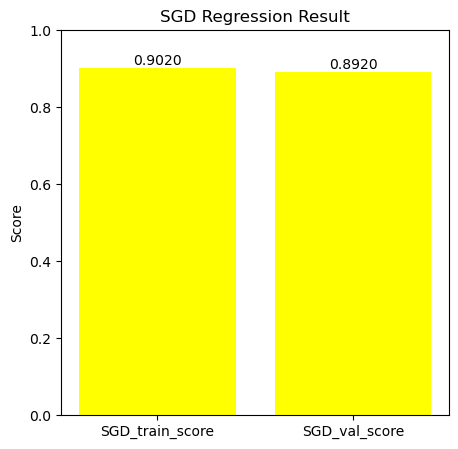

In [24]:
# 교차검증 전 후 정확도 비교
labels = ['SGD_train_score', 'SGD_val_score']
scores = [SGD_train, SGD_val]

plt.figure(figsize=(5, 5))
plt.bar(labels, scores, color=['yellow', 'yellow'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('SGD Regression Result')

for label, score in zip(labels, scores):
    plt.text(label, score, f'{score:.4f}', ha='center', va='bottom')

plt.show()

## RANDOM FOREST

In [25]:
# 랜덤포레스트 사용
rf = RandomForestClassifier(random_state=42)
rf.fit(train_input, train_target)

RandomForestClassifier(random_state=42)

In [26]:
rf_train = rf.score(train_input, train_target)
rf_val = rf.score(val_input, val_target)

In [27]:
print(rf_train)
print(rf_val)

1.0
0.8920454545454546


#### feature_importances

In [28]:
# 특성 중요도 알아보기
importances = rf.feature_importances_ 
feature_names = input.columns

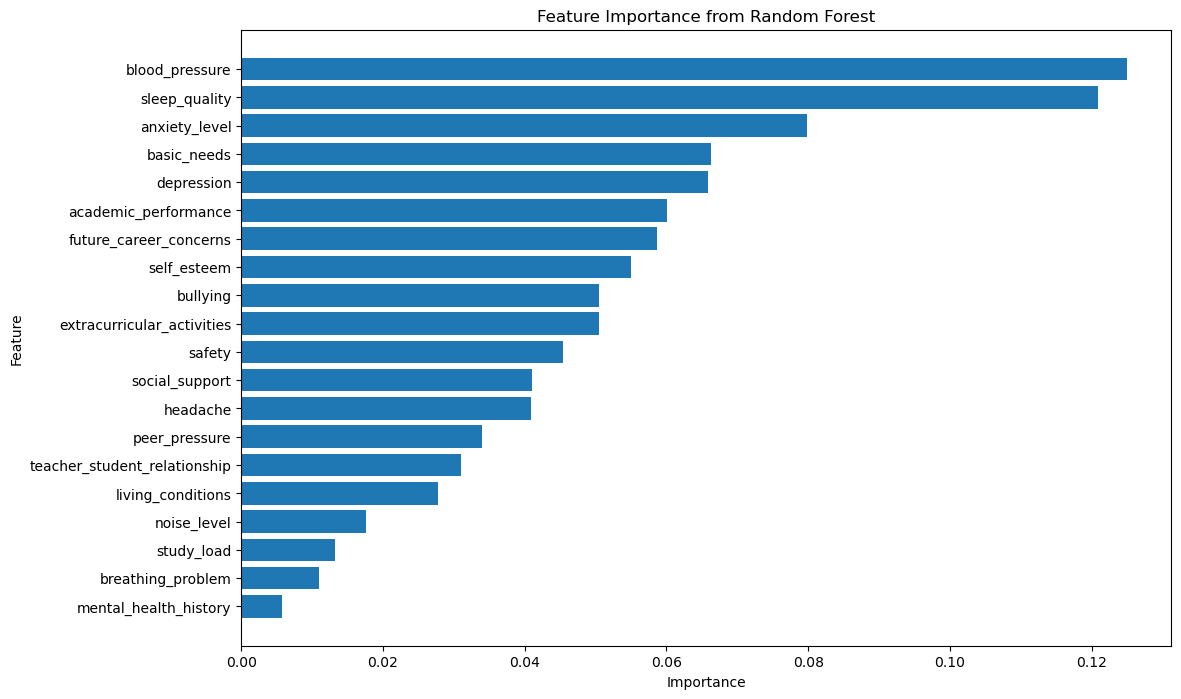

In [29]:
# Importance 열을 기준으로 내림차순(큰 값에서 작은 값 순서로) 정렬
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()

In [30]:
importance_df

,Feature,Importance
5,blood_pressure,0.124982
6,sleep_quality,0.120892
0,anxiety_level,0.079808
11,basic_needs,0.066271
3,depression,0.065859
12,academic_performance,0.060065
15,future_career_concerns,0.058670
1,self_esteem,0.055020
19,bullying,0.050446
18,extracurricular_activities,0.050435


## GRIDSEARCH

In [31]:
# 그리드 서치로 랜덤포레스트의 하어퍼파라미터 설정
import numpy as np

param_grid = {
    'max_depth': range(5, 30, 2),  # Smaller range and step size
    'min_samples_split': range(2, 10, 2),  # Smaller range and step size
    'min_samples_leaf': range(1, 10, 2),  # Smaller range and step size
    'min_impurity_decrease': np.logspace(-3, -2, 5)  # Fewer values
}

In [39]:
from sklearn.model_selection import GridSearchCV

# 그리드서치로 최적의 하이퍼파라미터 찾기
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)
grid_search.fit(train_input, train_target)

Fitting 2 folds for each of 1300 candidates, totalling 2600 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 30, 2),
                         'min_impurity_decrease': array([0.001     , 0.00177828, 0.00316228, 0.00562341, 0.01      ]),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)},
             verbose=2)

In [40]:
# 최적의 하이퍼파라미터 찾기
best_rf = grid_search.best_estimator_

In [41]:
# 하이퍼파라미터 튜닝 후 최적의 랜덤 포레스트 모델의 정확도
rf_gs_train = best_rf.score(train_input, train_target)
rf_gs_val = best_rf.score(val_input, val_target)

In [42]:
print(rf_gs_train)
print(rf_gs_val)

0.9602272727272727
0.8977272727272727


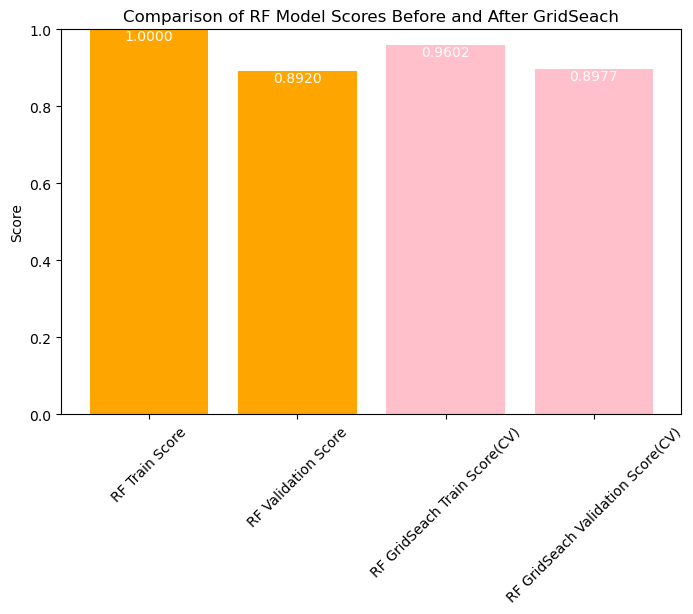

In [54]:
# 시각화
labels = ['RF Train Score', 'RF Validation Score', 
          'RF GridSeach Train Score(CV)', 'RF GridSeach Validation Score(CV)']
scores = [rf_train, rf_val, 
          rf_gs_train, rf_gs_val]

plt.figure(figsize=(8, 5))
plt.bar(labels, scores, color=['orange', 'orange', 'pink', 'pink'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Comparison of RF Model Scores Before and After GridSeach')
plt.xticks(rotation=45)

for label, score in zip(labels, scores):
    plt.text(label, score, f'{score:.4f}', ha='center', va='top', color ='white')

plt.show()

In [55]:
# random search
from scipy.stats import uniform, randint

params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20,50),
          'min_samples_split': randint(2,25),
          'min_samples_leaf': randint(1,25) 
          }

from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(RandomForestClassifier(random_state=42), params,
                        n_iter=100, n_jobs=-1, random_state=42) #n_iter = 반복을 몇번 할 것인지(sample을 100번 하곘다.)
rs.fit(train_input, train_target)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002BA212FEE10>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002BA23EB07A0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002BA23EB40B0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002BA23EB1820>},
                   random_state=42)

In [56]:
best_rs_rf = rs.best_estimator_

In [57]:
rf_rs_train = best_rs_rf.score(train_input, train_target)
rf_rs_val = best_rs_rf.score(val_input, val_target)

In [58]:
print(rf_rs_train)
print(rf_rs_val)

0.9005681818181818
0.9034090909090909


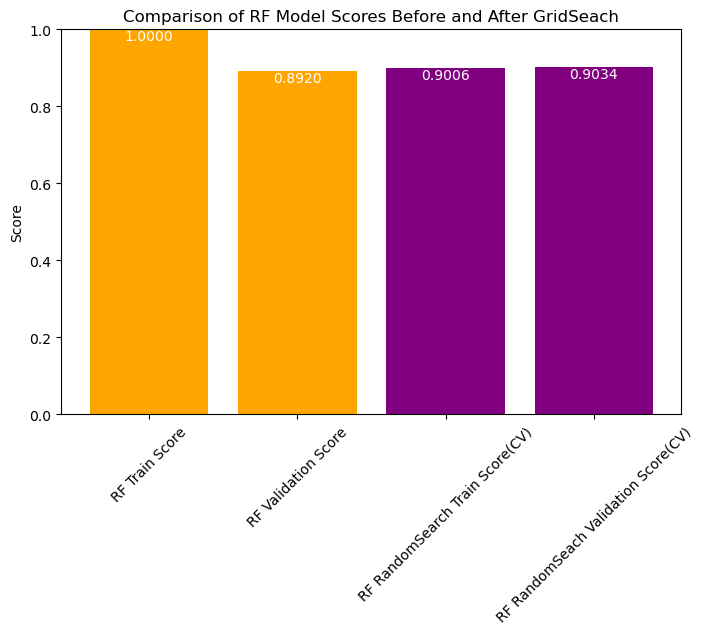

In [59]:
# 시각화
labels = ['RF Train Score', 'RF Validation Score', 
          'RF RandomSearch Train Score(CV)', 'RF RandomSeach Validation Score(CV)']
scores = [rf_train, rf_val, 
          rf_rs_train, rf_rs_val]

plt.figure(figsize=(8, 5))
plt.bar(labels, scores, color=['orange', 'orange', 'purple', 'purple'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Comparison of RF Model Scores Before and After GridSeach')
plt.xticks(rotation=45)

for label, score in zip(labels, scores):
    plt.text(label, score, f'{score:.4f}', ha='center', va='top', color ='white')

plt.show()

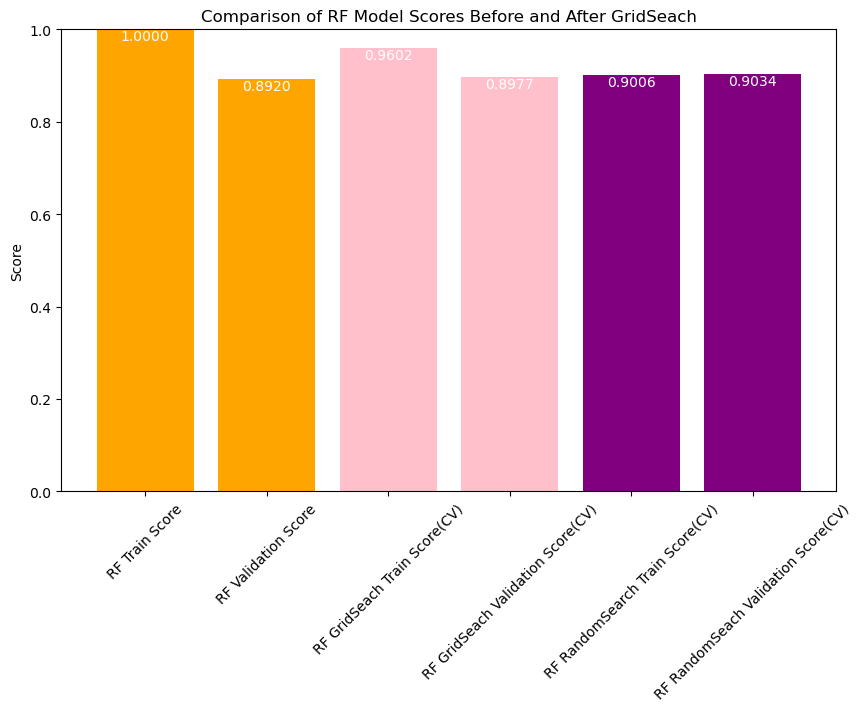

In [60]:
# 시각화
labels = ['RF Train Score', 'RF Validation Score', 
          'RF GridSeach Train Score(CV)', 'RF GridSeach Validation Score(CV)',
          'RF RandomSearch Train Score(CV)', 'RF RandomSeach Validation Score(CV)']
scores = [rf_train, rf_val, 
          rf_gs_train, rf_gs_val,
          rf_rs_train, rf_rs_val]

plt.figure(figsize=(10, 6))
plt.bar(labels, scores, color=['orange', 'orange', 'pink', 'pink', 'purple', 'purple'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Comparison of RF Model Scores Before and After GridSeach')
plt.xticks(rotation=45)

for label, score in zip(labels, scores):
    plt.text(label, score, f'{score:.4f}', ha='center', va='top', color ='white')

plt.show()

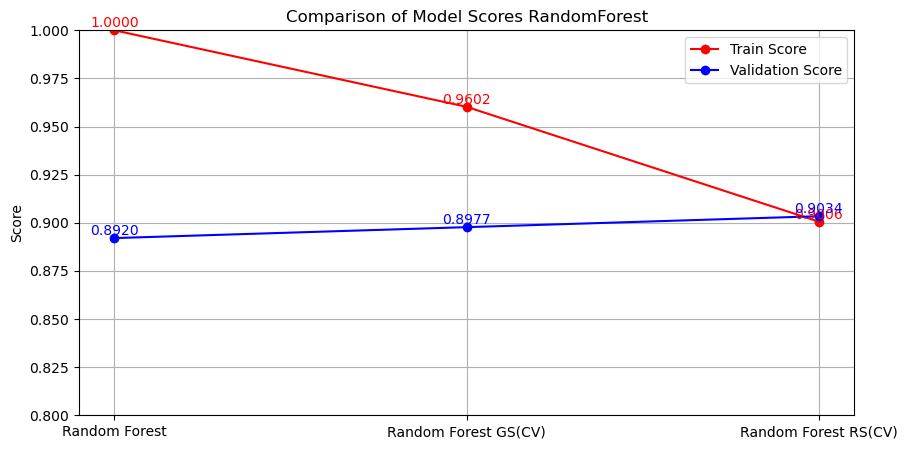

In [61]:
import matplotlib.pyplot as plt

# 데이터 준비
models = ['Random Forest', 'Random Forest GS(CV)','Random Forest RS(CV)',]
train_scores = [rf_train, rf_gs_train, rf_rs_train, ]
val_scores = [rf_val, rf_gs_val, rf_rs_val, ]

# 그래프 설정
plt.figure(figsize=(10, 5))

# 그래프 그리기
x = range(len(models))
plt.plot(x, train_scores, marker='o', color='red', label='Train Score')
plt.plot(x, val_scores, marker='o', color='blue', label='Validation Score')

# 축 설정
plt.ylim(0.8, 1)
plt.ylabel('Score')
plt.title('Comparison of Model Scores RandomForest')
plt.xticks(x, models)

# 점수 표시
for i in x:
    plt.text(i, train_scores[i], f'{train_scores[i]:.4f}', ha='center', va='bottom', color='red')
    plt.text(i, val_scores[i], f'{val_scores[i]:.4f}', ha='center', va='bottom', color='blue')        

# 그리드 및 레전드 설정
plt.grid(True)
plt.legend()
plt.show()


## DECISION TREE

In [62]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input,train_target))
print(dt.score(val_input, val_target))

1.0
0.8806818181818182


In [63]:
dt_train = dt.score(train_input,train_target)
dt_val = dt.score(val_input, val_target)

In [64]:
print(dt_train)
print(dt_val)

1.0
0.8806818181818182


In [65]:
# decision tree entropy
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42, criterion='entropy')
dt.fit(train_input, train_target)

print(dt.score(train_input,train_target))
print(dt.score(val_input, val_target))

1.0
0.8920454545454546


In [66]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input,train_target))
print(dt.score(val_input, val_target))

0.8977272727272727
0.8863636363636364


In [67]:
print(dt.feature_importances_)

[0.         0.         0.         0.         0.         0.54001435
 0.43186883 0.         0.         0.02811682 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


In [68]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input,train_target))
print(dt.score(val_input, val_target))

1.0
0.8806818181818182


In [69]:
# DT grid search
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [70]:
best_dt_gs = gs.best_estimator_
print(dt.score(train_input, train_target))

1.0


In [71]:
dt_gs_train = best_dt_gs.score(train_input, train_target)
dt_gs_val = best_dt_gs.score(val_input, val_target)

In [72]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [73]:
print(gs.cv_results_['mean_test_score'])

[0.87926039 0.87926039 0.87926039 0.87926039 0.87926039]


In [74]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [75]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8792603850050658


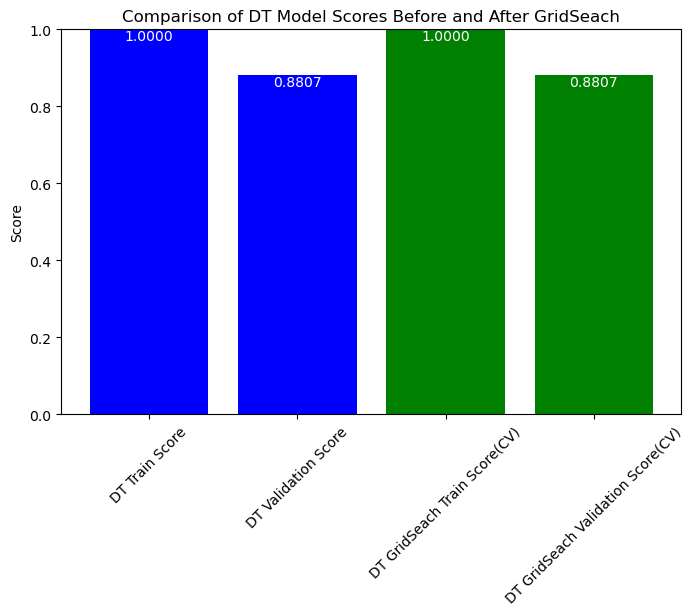

In [76]:
# 그리드 서치 전후 시각화
labels = ['DT Train Score', 'DT Validation Score', 
          'DT GridSeach Train Score(CV)', 'DT GridSeach Validation Score(CV)']
scores = [dt_train, dt_val, 
          dt_gs_train, dt_gs_val]

plt.figure(figsize=(8, 5))
plt.bar(labels, scores, color=['blue', 'blue', 'green', 'green'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Comparison of DT Model Scores Before and After GridSeach')
plt.xticks(rotation=45)

for label, score in zip(labels, scores):
    plt.text(label, score, f'{score:.4f}', ha='center', va='top', color = 'white')

plt.show()

In [77]:
# random search
from scipy.stats import uniform, randint

params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20,50),
          'min_samples_split': randint(2,25),
          'min_samples_leaf': randint(1,25) 
          }

from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params,
                        n_iter=100, n_jobs=-1, random_state=42) #n_iter = 반복을 몇번 할 것인지(sample을 100번 하곘다.)
rs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002BA23EA2CC0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002BA214EDCD0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002BA212FE630>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002BA23F1BC80>},
                   random_state=42)

In [78]:
best_rs_dt = rs.best_estimator_

In [79]:
dt_rs_train = best_rs_dt.score(train_input, train_target)
dt_rs_val = best_rs_dt.score(val_input, val_target)

In [80]:
print(dt_rs_train)
print(dt_rs_val)

0.9048295454545454
0.8806818181818182


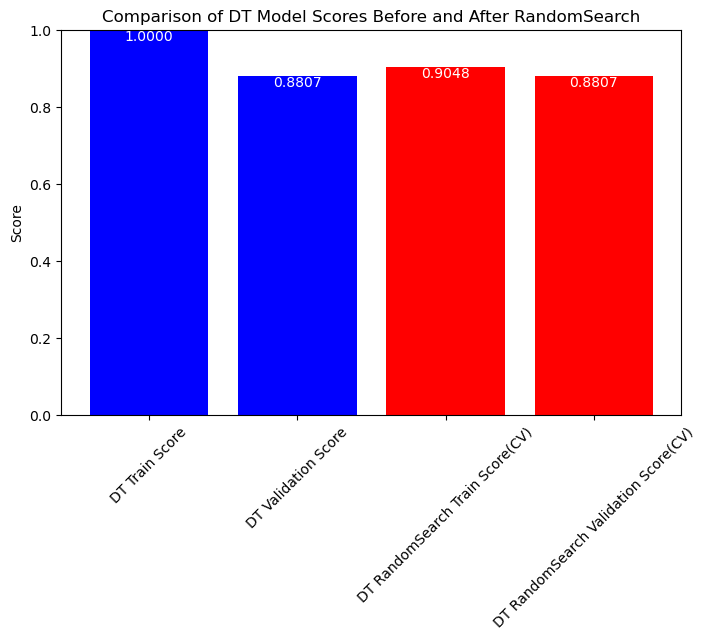

In [81]:
# 랜덤 서치 전후 시각화
labels = ['DT Train Score', 'DT Validation Score', 
          'DT RandomSearch Train Score(CV)', 'DT RandomSearch Validation Score(CV)']
scores = [dt_train, dt_val, 
          dt_rs_train, dt_rs_val]

plt.figure(figsize=(8, 5))
plt.bar(labels, scores, color=['blue', 'blue', 'red', 'red'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Comparison of DT Model Scores Before and After RandomSearch')
plt.xticks(rotation=45)

for label, score in zip(labels, scores):
    plt.text(label, score, f'{score:.4f}', ha='center', va='top', color ='white')

plt.show()

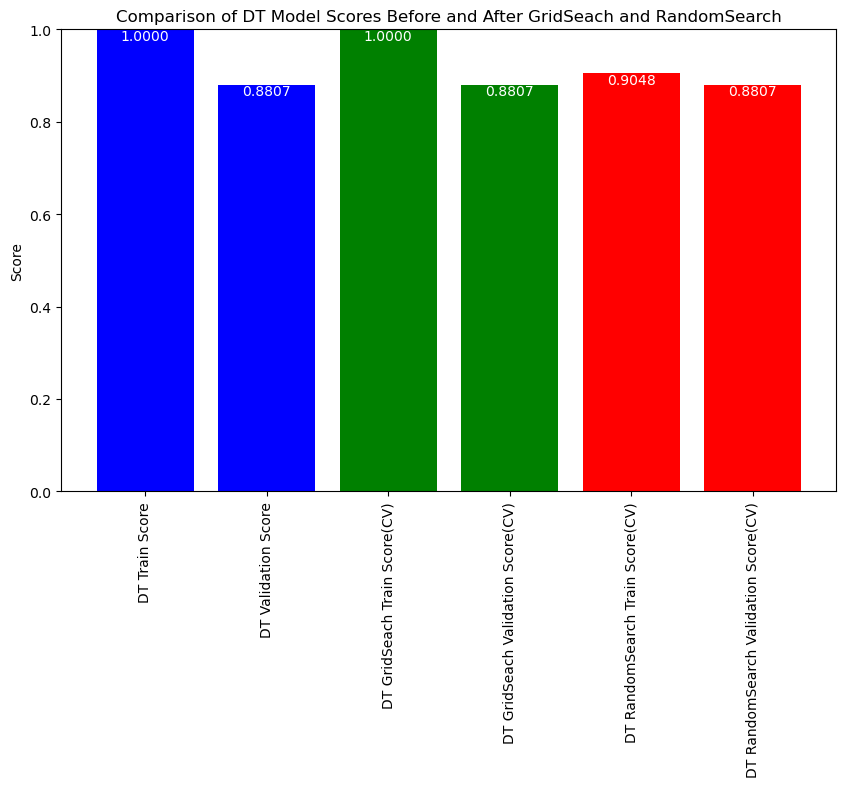

In [82]:
# 그리드서치, 랜덤 서치 후 비교 시각화
labels = ['DT Train Score', 'DT Validation Score', 
          'DT GridSeach Train Score(CV)', 'DT GridSeach Validation Score(CV)', 
          'DT RandomSearch Train Score(CV)', 'DT RandomSearch Validation Score(CV)' ]
scores = [dt_train, dt_val, 
          dt_gs_train, dt_gs_val,
         dt_rs_train, dt_rs_val]

plt.figure(figsize=(10, 6))
plt.bar(labels, scores, color=['blue', 'blue', 'green', 'green', 'red' ,'red'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Comparison of DT Model Scores Before and After GridSeach and RandomSearch')
plt.xticks(rotation=90)

for label, score in zip(labels, scores):
    plt.text(label, score, f'{score:.4f}', ha='center', va='top', color ='white')

plt.show()

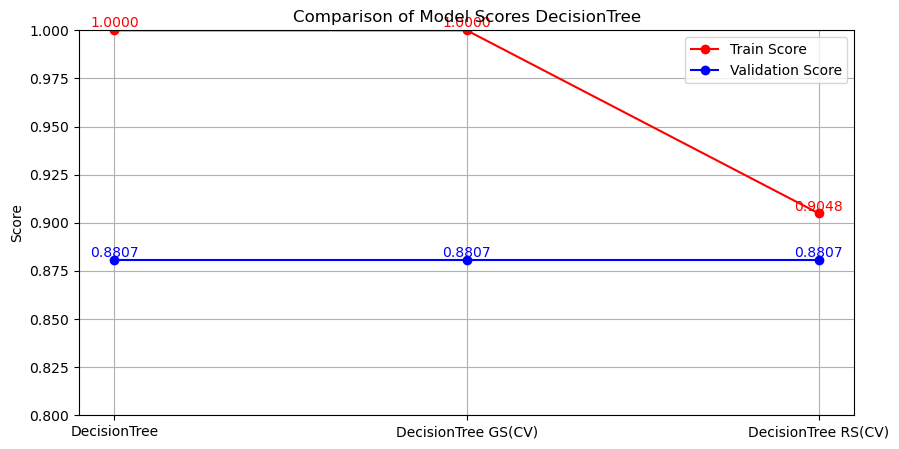

In [83]:
import matplotlib.pyplot as plt

# 데이터 준비
models = ['DecisionTree', 'DecisionTree GS(CV)','DecisionTree RS(CV)',]
train_scores = [dt_train, dt_gs_train, dt_rs_train, ]
val_scores = [dt_val, dt_gs_val, dt_rs_val, ]

# 그래프 설정
plt.figure(figsize=(10, 5))

# 그래프 그리기
x = range(len(models))
plt.plot(x, train_scores, marker='o', color='red', label='Train Score')
plt.plot(x, val_scores, marker='o', color='blue', label='Validation Score')

# 축 설정
plt.ylim(0.8, 1)
plt.ylabel('Score')
plt.title('Comparison of Model Scores DecisionTree')
plt.xticks(x, models)

# 점수 표시
for i in x:
    plt.text(i, train_scores[i], f'{train_scores[i]:.4f}', ha='center', va='bottom', color='red')
    plt.text(i, val_scores[i], f'{val_scores[i]:.4f}', ha='center', va='bottom', color='blue')        

# 그리드 및 레전드 설정
plt.grid(True)
plt.legend()
plt.show()


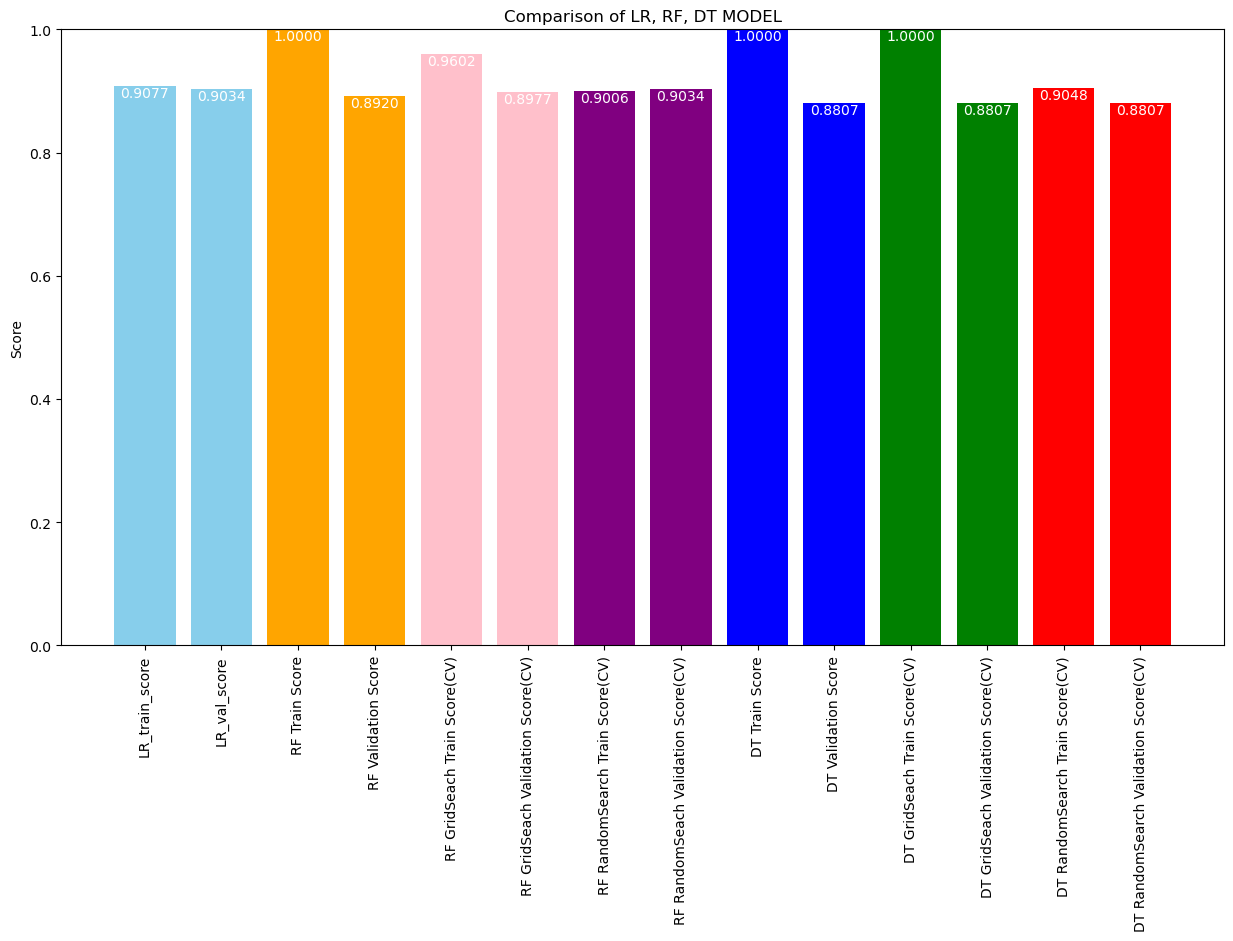

In [84]:
## lr, rs, dt 전체 비교

labels = ['LR_train_score', 'LR_val_score' , 'RF Train Score', 'RF Validation Score', 
          'RF GridSeach Train Score(CV)', 'RF GridSeach Validation Score(CV)', 
          'RF RandomSearch Train Score(CV)', 'RF RandomSeach Validation Score(CV)',
          'DT Train Score', 'DT Validation Score', 
          'DT GridSeach Train Score(CV)', 'DT GridSeach Validation Score(CV)', 
          'DT RandomSearch Train Score(CV)', 'DT RandomSearch Validation Score(CV)']

scores = [lr_train, lr_val , rf_train, rf_val, 
          rf_gs_train, rf_gs_val, 
          rf_rs_train, rf_rs_val,
          dt_train, dt_val, 
          dt_gs_train, dt_gs_val,
          dt_rs_train, dt_rs_val]

plt.figure(figsize=(15, 8))
plt.bar(labels, scores, color=['skyblue', 'skyblue','orange', 'orange', 'pink', 'pink','purple','purple','blue', 'blue', 'green', 'green', 'red' ,'red'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Comparison of LR, RF, DT MODEL')
plt.xticks(rotation=90)

for label, score in zip(labels, scores):
    plt.text(label, score, f'{score:.4f}', ha='center', va='top', color ='white')

plt.show()

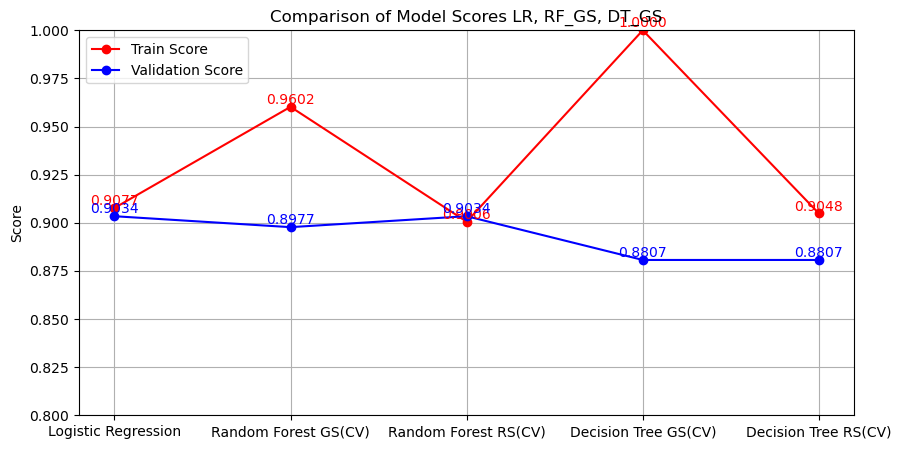

In [85]:
import matplotlib.pyplot as plt

# 데이터 준비
models = ['Logistic Regression', 'Random Forest GS(CV)','Random Forest RS(CV)', 'Decision Tree GS(CV)','Decision Tree RS(CV)']
train_scores = [lr_train, rf_gs_train, rf_rs_train, dt_gs_train, dt_rs_train]
val_scores = [lr_val, rf_gs_val, rf_rs_val, dt_gs_val, dt_rs_val]

# 그래프 설정
plt.figure(figsize=(10, 5))

# 그래프 그리기
x = range(len(models))
plt.plot(x, train_scores, marker='o', color='red', label='Train Score')
plt.plot(x, val_scores, marker='o', color='blue', label='Validation Score')

# 축 설정
plt.ylim(0.8, 1)
plt.ylabel('Score')
plt.title('Comparison of Model Scores LR, RF_GS, DT_GS')
plt.xticks(x, models)

# 점수 표시
for i in x:
    plt.text(i, train_scores[i], f'{train_scores[i]:.4f}', ha='center', va='bottom', color='red')
    plt.text(i, val_scores[i], f'{val_scores[i]:.4f}', ha='center', va='bottom', color='blue')

# 그리드 및 레전드 설정
plt.grid(True)
plt.legend()
plt.show()


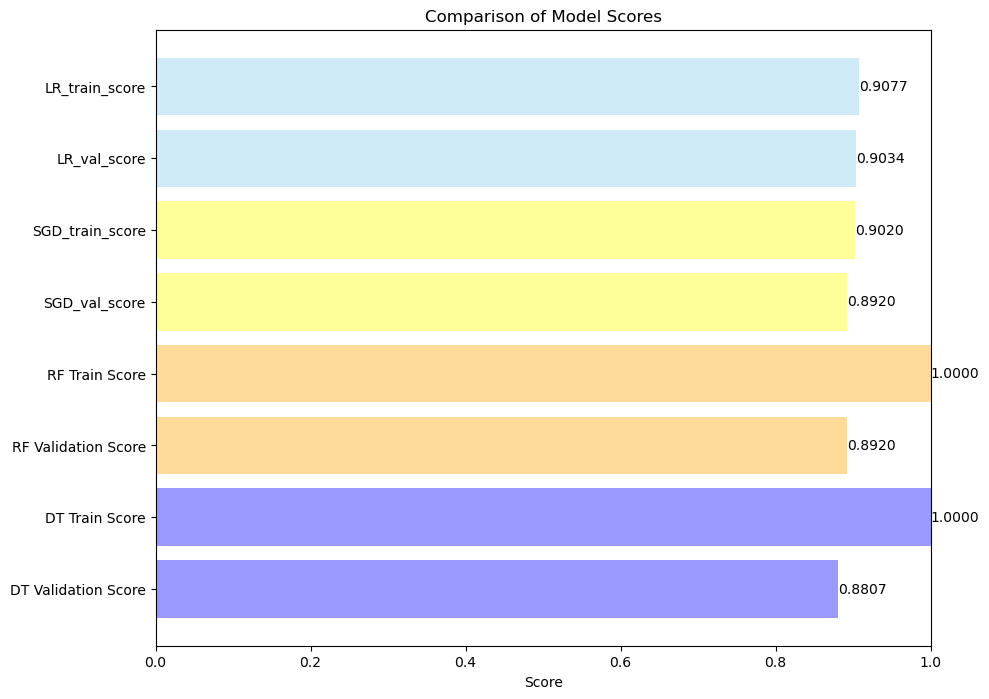

In [86]:
## lr, rs, dt 전체 비교

labels = ['LR_train_score', 'LR_val_score', 'SGD_train_score', 'SGD_val_score', 'RF Train Score', 'RF Validation Score', 
          'DT Train Score', 'DT Validation Score']
scores = [lr_train, lr_val, SGD_train, SGD_val, rf_train, rf_val, dt_train, dt_val]

# 그래프 설정
plt.figure(figsize=(10, 8))

# 가로 막대 그래프 그리기
plt.barh(labels, scores, color=['skyblue', 'skyblue', 'yellow', 'yellow', 'orange', 'orange', 'blue', 'blue'], alpha = 0.4)

# 축 설정
plt.xlim(0, 1)
plt.xlabel('Score')
plt.title('Comparison of Model Scores')

# 점수 표시
for index, score in enumerate(scores):
    plt.text(score, index, f'{score:.4f}', ha='left', va='center', color='black')

# 그리드 설정
plt.grid(False)
plt.gca().invert_yaxis()  # y축 반전 (기존과 동일한 순서를 유지하기 위해)

plt.show()

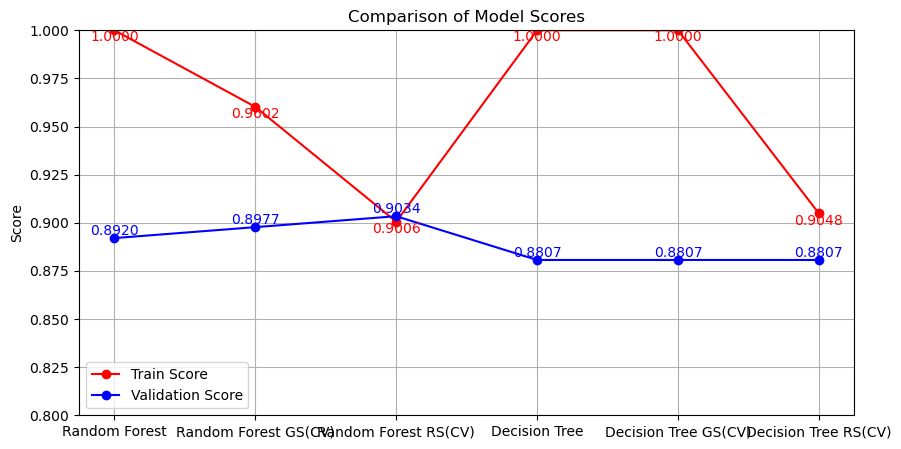

In [87]:
import matplotlib.pyplot as plt

# 데이터 준비
models = ['Random Forest','Random Forest GS(CV)','Random Forest RS(CV)', 'Decision Tree', 'Decision Tree GS(CV)','Decision Tree RS(CV)' ]
train_scores = [rf_train , rf_gs_train, rf_rs_train, dt_train, dt_gs_train, dt_rs_train]
val_scores = [rf_val, rf_gs_val, rf_rs_val, dt_val, dt_gs_val, dt_rs_val]

# 그래프 설정
plt.figure(figsize=(10, 5))

# 그래프 그리기
x = range(len(models))
plt.plot(x, train_scores, marker='o', color='red', label='Train Score')
plt.plot(x, val_scores, marker='o', color='blue', label='Validation Score')

# 축 설정
plt.ylim(0.8, 1)
plt.ylabel('Score')
plt.title('Comparison of Model Scores')
plt.xticks(x, models)

# 점수 표시
for i in x:
    plt.text(i, train_scores[i], f'{train_scores[i]:.4f}', ha='center', va='top', color='red')
    plt.text(i, val_scores[i], f'{val_scores[i]:.4f}', ha='center', va='bottom', color='blue')

# 그리드 및 레전드 설정
plt.grid(True)
plt.legend()
plt.show()


### test 결과

In [470]:
test_input = test[['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying']]

In [471]:
test_target = test['stress_level']

In [487]:
scores = []
for _ in range(10):
    best_rs_rf.fit(train_input, train_target)
    score = best_rs_rf.score(test_input, test_target)
    scores.append(score)
    
final_score = np.mean(scores)
print(final_score)

0.8590909090909091
